# Predictive Analytics on ERMN Streamside Birds (Point Count)
**Introduction:** Short overview of predictive analytics, ML types (supervised vs unsupervised), and the goal of this notebook:
- Perform EDA, preprocessing, regression, classification, and clustering on bird point-count data.
- Evaluate models using standard metrics (MAE, MSE, RMSE, R² for regression; accuracy, logloss, AUC, precision, recall, F1, confusion matrix for classification).


In [21]:
#Imports and basic settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             accuracy_score, log_loss, roc_auc_score, precision_score,
                             recall_score, f1_score, confusion_matrix, classification_report)
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [22]:
#Load CSV and preview
df = pd.read_csv('ERMN_StreamsideBirds_2315071_PointCount.csv')
print("Rows, Columns:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all').T)

Rows, Columns: (55071, 37)


,Unit_Code,Site_Name,Site_ID,Station_ID,Panel,Visit,Start_Date_ISO,Observer_Initials,Ambient_Noise,Road_Noise,...,Minute_8,Minute_9,Minute_10,Minutes_Accurate,First_Minute_Detected,Hemlock_Condition_Score,Latitude,Longitude,Random_Station,Event_ID
0,ALPO,Millstone Run,ALPO.1001,ALPO.1001.1R,0,1,2011-05-27,MRM,49.0,False,...,FALSE,FALSE,FALSE,TRUE,1,0,40.418713,-78.483485,True,ALPO.1001.1R_2011-05-27_06:38
1,ALPO,Millstone Run,ALPO.1001,ALPO.1001.1R,0,1,2011-05-27,MRM,49.0,False,...,TRUE,TRUE,TRUE,TRUE,1,0,40.418713,-78.483485,True,ALPO.1001.1R_2011-05-27_06:38
2,ALPO,Millstone Run,ALPO.1001,ALPO.1001.1R,0,1,2011-05-27,MRM,49.0,False,...,TRUE,FALSE,FALSE,TRUE,2,0,40.418713,-78.483485,True,ALPO.1001.1R_2011-05-27_06:38
3,ALPO,Millstone Run,ALPO.1001,ALPO.1001.1R,0,1,2011-05-27,MRM,49.0,False,...,TRUE,TRUE,FALSE,TRUE,1,0,40.418713,-78.483485,True,ALPO.1001.1R_2011-05-27_06:38
4,ALPO,Millstone Run,ALPO.1001,ALPO.1001.1R,0,1,2011-05-27,MRM,49.0,False,...,FALSE,FALSE,FALSE,TRUE,2,0,40.418713,-78.483485,True,ALPO.1001.1R_2011-05-27_06:38


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55071 entries, 0 to 55070
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unit_Code                55071 non-null  object 
 1   Site_Name                55071 non-null  object 
 2   Site_ID                  55071 non-null  object 
 3   Station_ID               55071 non-null  object 
 4   Panel                    55071 non-null  int64  
 5   Visit                    55071 non-null  int64  
 6   Start_Date_ISO           55071 non-null  object 
 7   Observer_Initials        55071 non-null  object 
 8   Ambient_Noise            55071 non-null  float64
 9   Road_Noise               55071 non-null  bool   
 10  Start_Time_ISO           55071 non-null  object 
 11  No_Birds                 55071 non-null  bool   
 12  Species_Code             55071 non-null  object 
 13  Common_Name              55071 non-null  object 
 14  Scientific_Name       

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unit_Code,55071,6,DEWA,22323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Site_Name,55071,82,UNT to Great Meadows Run,1908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Site_ID,55071,82,FONE.1002,1908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Station_ID,55071,246,FONE.1002.3R,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Panel,55071.0,NaN,NaN,NaN,1.057508,0.791237,0.0,0.0,1.0,2.0,2.0
Visit,55071.0,NaN,NaN,NaN,2.50444,1.11767,1.0,2.0,3.0,4.0,4.0
Start_Date_ISO,55071,419,2025-06-03,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Observer_Initials,55071,12,NMF,18660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ambient_Noise,55071.0,NaN,NaN,NaN,46.913503,7.43224,30.0,41.0,47.0,52.25,72.25
Road_Noise,55071,2,False,46280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Basic cleaning and normalizing column names
df.columns = df.columns.str.strip()  # trim whitespace
possible_species_cols = ['Species', 'Common_Name', 'species']
for c in possible_species_cols:
    if c in df.columns:
        species_col = c
        break
else:
    species_col = None
if 'Start_Date_ISO' in df.columns:
    df['Start_Date'] = pd.to_datetime(df['Start_Date_ISO'], errors='coerce')
print("Species column detected as:", species_col)
df.head(3)

Species column detected as: Common_Name


,Unit_Code,Site_Name,Site_ID,Station_ID,Panel,Visit,Start_Date_ISO,Observer_Initials,Ambient_Noise,Road_Noise,...,Minute_9,Minute_10,Minutes_Accurate,First_Minute_Detected,Hemlock_Condition_Score,Latitude,Longitude,Random_Station,Event_ID,Start_Date
0,ALPO,Millstone Run,ALPO.1001,ALPO.1001.1R,0,1,2011-05-27,MRM,49.0,False,...,FALSE,FALSE,TRUE,1,0,40.418713,-78.483485,True,ALPO.1001.1R_2011-05-27_06:38,2011-05-27
1,ALPO,Millstone Run,ALPO.1001,ALPO.1001.1R,0,1,2011-05-27,MRM,49.0,False,...,TRUE,TRUE,TRUE,1,0,40.418713,-78.483485,True,ALPO.1001.1R_2011-05-27_06:38,2011-05-27
2,ALPO,Millstone Run,ALPO.1001,ALPO.1001.1R,0,1,2011-05-27,MRM,49.0,False,...,FALSE,FALSE,TRUE,2,0,40.418713,-78.483485,True,ALPO.1001.1R_2011-05-27_06:38,2011-05-27


In [24]:
#Event-level aggregation
if 'Event_ID' not in df.columns:
    df['Event_ID'] = (
        df['Station_ID'].astype(str) + '_' +
        pd.to_datetime(df['Start_Date']).dt.strftime('%Y-%m-%d_%H:%M')
    )
minute_cols = [c for c in df.columns if c.lower().startswith('minute_')]
for c in minute_cols:
    df[c] = (
        df[c]
        .map({True: 1, False: 0, 'TRUE': 1, 'FALSE': 0, 'True': 1, 'False': 0})
        .fillna(0)
        .astype(int)
    )
numeric_cols = ['Ambient_Noise', 'First_Minute_Detected']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
grouped = df.groupby('Event_ID').agg(
    observations=(
        species_col if species_col else df.columns[0], 'count'
    ),
    species_unique=(
        species_col if species_col else df.columns[0], lambda s: s.nunique()
    ),
    observer=(
        'Observer_Initials', 'first'
    ) if 'Observer_Initials' in df.columns else (
        'Station_ID', 'first'
    ),
    ambient_noise=(
        'Ambient_Noise', 'median'
    ) if 'Ambient_Noise' in df.columns else (
        'Station_ID', 'first'
    ),
    latitude=(
        'Latitude', 'first'
    ) if 'Latitude' in df.columns else (
        'Station_ID', 'first'
    ),
    longitude=(
        'Longitude', 'first'
    ) if 'Longitude' in df.columns else (
        'Station_ID', 'first'
    ),
    first_minute=(
        'First_Minute_Detected', 'median'
    ) if 'First_Minute_Detected' in df.columns else (
        'Station_ID', 'first'
    )
).reset_index()
for m in minute_cols:
    grouped[m + '_sum'] = df.groupby('Event_ID')[m].sum().values
grouped['total_detections'] = grouped['observations']
grouped['unique_species'] = grouped['species_unique']
if 'Start_Date' in df.columns:
    first_dates = df.groupby('Event_ID')['Start_Date'].first().reset_index()
    grouped = grouped.merge(first_dates, on='Event_ID', how='left')
    grouped['year'] = pd.to_datetime(grouped['Start_Date']).dt.year
else:
    grouped['year'] = np.nan
grouped['high_detection'] = (
    grouped['total_detections'] >
    grouped['total_detections'].median()
).astype(int)
display(grouped.head())
print("Shape:", grouped.shape)

,Event_ID,observations,species_unique,observer,ambient_noise,latitude,longitude,first_minute,Minute_1_sum,Minute_2_sum,...,Minute_6_sum,Minute_7_sum,Minute_8_sum,Minute_9_sum,Minute_10_sum,total_detections,unique_species,Start_Date,year,high_detection
0,ALPO.1001.1R_2011-05-27_06:38,9,9,MRM,49.00,40.418713,-78.483485,1.0,5,7,...,3,3,3,3,3,9,9,2011-05-27,2011,0
1,ALPO.1001.1R_2011-05-27_09:15,10,10,MRM,49.00,40.418713,-78.483485,3.5,3,5,...,4,3,4,4,6,10,10,2011-05-27,2011,1
2,ALPO.1001.1R_2011-06-27_08:12,9,8,MRM,49.00,40.418713,-78.483485,1.0,5,4,...,3,5,4,3,3,9,8,2011-06-27,2011,0
3,ALPO.1001.1R_2011-06-27_10:23,9,8,MRM,49.00,40.418713,-78.483485,4.0,4,4,...,4,5,5,5,5,9,8,2011-06-27,2011,0
4,ALPO.1001.1R_2012-06-04_06:22,6,6,MRM,57.25,40.418713,-78.483485,2.0,2,4,...,1,1,0,2,2,6,6,2012-06-04,2012,0


Shape: (5912, 23)


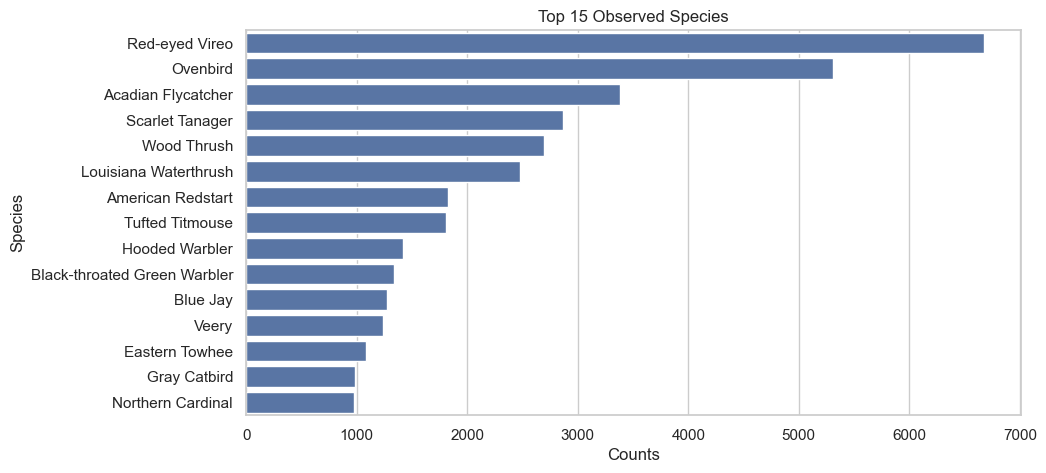

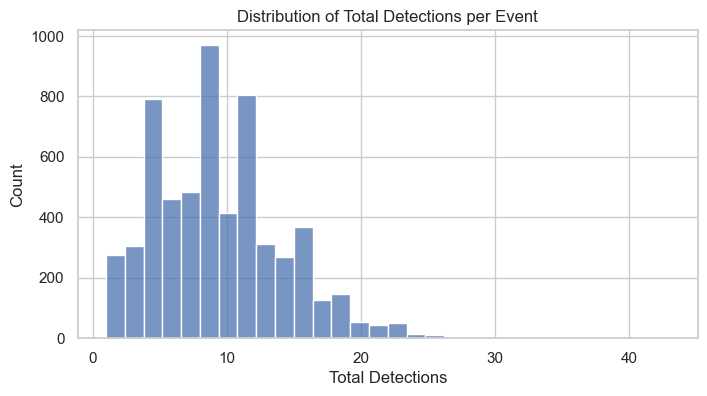

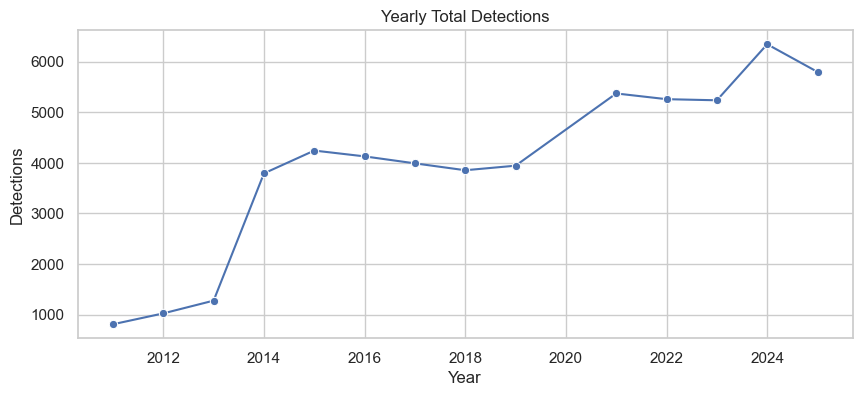

In [25]:
#EDA - species frequency, distribution of detections, time trends
if species_col:
    top_species = df[species_col].value_counts().nlargest(15)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_species.values, y=top_species.index)
    plt.title("Top 15 Observed Species")
    plt.xlabel("Counts")
    plt.ylabel("Species")
    plt.show()
plt.figure(figsize=(8,4))
sns.histplot(grouped['total_detections'], bins=30, kde=False)
plt.title("Distribution of Total Detections per Event")
plt.xlabel("Total Detections")
plt.show()
if 'year' in grouped.columns and grouped['year'].notna().any():
    yearly = grouped.groupby('year')['total_detections'].sum()
    plt.figure(figsize=(10,4))
    sns.lineplot(x=yearly.index, y=yearly.values, marker='o')
    plt.title("Yearly Total Detections")
    plt.xlabel("Year")
    plt.ylabel("Detections")
    plt.show()

In [26]:
#Prepare features and labels
features = ['unique_species', 'total_detections']
# add minute sums if available
minute_sum_cols = [c for c in grouped.columns if c.endswith('_sum')]
features += minute_sum_cols
# ambient noise if exists
if 'ambient_noise' in grouped.columns:
    features.append('ambient_noise')
features = [f for f in features if f in grouped.columns]
X = grouped[features].fillna(0).copy()
y_reg = grouped['total_detections'].astype(float)    # regression target
y_bin = grouped['high_detection'].astype(int)        # binary classification target
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.25, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_bin, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)
print("Feature set used:", features)
print("Train shapes:", X_train_reg_scaled.shape, X_test_reg_scaled.shape)

Feature set used: ['unique_species', 'total_detections', 'Minute_1_sum', 'Minute_2_sum', 'Minute_3_sum', 'Minute_4_sum', 'Minute_5_sum', 'Minute_6_sum', 'Minute_7_sum', 'Minute_8_sum', 'Minute_9_sum', 'Minute_10_sum', 'ambient_noise']
Train shapes: (4434, 13) (1478, 13)


Simple Linear Regression (ambient_noise -> total_detections)
MAE: 2.9631156654341684
MSE: 14.041918396942718
RMSE: 3.747254781429029
R2: 0.37556987832611255


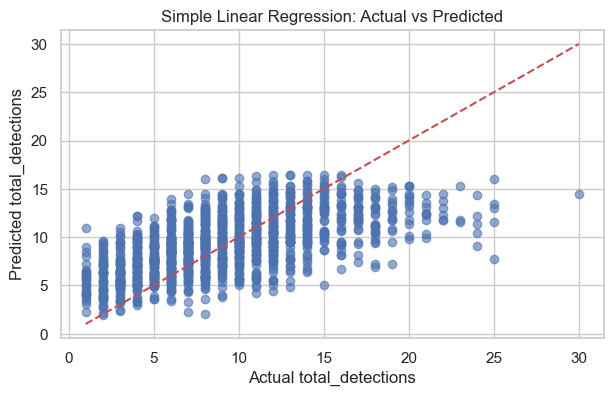

In [27]:
#Simple Linear Regression - using ambient_noise (if available) vs total_detections
from sklearn.linear_model import LinearRegression
if 'ambient_noise' in X.columns:
    X_simple_train = X_train_reg_scaled[:, features.index('ambient_noise')].reshape(-1,1)
    X_simple_test  = X_test_reg_scaled[:, features.index('ambient_noise')].reshape(-1,1)
    lr_simple = LinearRegression()
    lr_simple.fit(X_simple_train, y_train_reg)
    ypred_simple = lr_simple.predict(X_simple_test)
    print("Simple Linear Regression (ambient_noise -> total_detections)")
    print("MAE:", mean_absolute_error(y_test_reg, ypred_simple))
    print("MSE:", mean_squared_error(y_test_reg, ypred_simple))
    print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, ypred_simple)))
    print("R2:", r2_score(y_test_reg, ypred_simple))
# Plot actual vs predicted
    plt.figure(figsize=(7,4))
    plt.scatter(y_test_reg, ypred_simple, alpha=0.6)
    plt.xlabel("Actual total_detections")
    plt.ylabel("Predicted total_detections")
    plt.title("Simple Linear Regression: Actual vs Predicted")
    plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
    plt.show()
else:
    print("ambient_noise not present; skip simple linear example or pick another single feature.")

In [28]:
#Multiple Linear Regression with all selected features
linreg = LinearRegression()
linreg.fit(X_train_reg_scaled, y_train_reg)
y_pred_lin = linreg.predict(X_test_reg_scaled)
print("Multiple Linear Regression")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_lin))
print("MSE:", mean_squared_error(y_test_reg, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_lin)))
print("R2:", r2_score(y_test_reg, y_pred_lin))


Multiple Linear Regression
MAE: 2.690014802398945e-14
MSE: 1.153155590287141e-27
RMSE: 3.395814468264044e-14
R2: 1.0


In [29]:
#Polynomial Regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
Xtrain_poly = poly.fit_transform(X_train_reg_scaled)
Xtest_poly = poly.transform(X_test_reg_scaled)
poly_model = LinearRegression()
poly_model.fit(Xtrain_poly, y_train_reg)
y_pred_poly = poly_model.predict(Xtest_poly)
print("Polynomial Regression (deg=2) metrics:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_poly))
print("MSE:", mean_squared_error(y_test_reg, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_poly)))
print("R2:", r2_score(y_test_reg, y_pred_poly))

Polynomial Regression (deg=2) metrics:
MAE: 5.6417958562331907e-14
MSE: 6.327253703742179e-27
RMSE: 7.95440362550341e-14
R2: 1.0


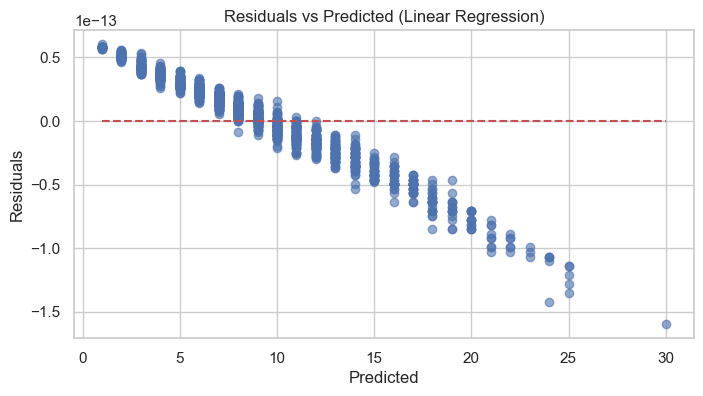

In [30]:
#Residuals plot for multiple linear regression
residuals = y_test_reg - y_pred_lin
plt.figure(figsize=(8,4))
plt.scatter(y_pred_lin, residuals, alpha=0.6)
plt.hlines(0, xmin=y_pred_lin.min(), xmax=y_pred_lin.max(), linestyles='dashed', colors='r')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Linear Regression)")
plt.show()

In [31]:
#Logistic Regression on high_detection
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train_clf_scaled, y_train_clf)
y_prob_logit = logit.predict_proba(X_test_clf_scaled)[:,1]
y_pred_logit = (y_prob_logit >= 0.5).astype(int)
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_logit))
print("Log Loss:", log_loss(y_test_clf, y_prob_logit))
try:
    print("AUC:", roc_auc_score(y_test_clf, y_prob_logit))
except:
    print("AUC: cannot compute (single class in y_test?)")
print("Precision:", precision_score(y_test_clf, y_pred_logit))
print("Recall:", recall_score(y_test_clf, y_pred_logit))
print("F1:", f1_score(y_test_clf, y_pred_logit))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_logit))

Logistic Regression Metrics:
Accuracy: 0.9986468200270636
Log Loss: 0.03119911427689318
AUC: 1.0
Precision: 1.0
Recall: 0.9967637540453075
F1: 0.9983792544570502
Confusion Matrix:
 [[860   0]
 [  2 616]]


In [32]:
#Compare multiple classifiers
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NaiveBayes': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train_clf_scaled, y_train_clf)
    y_pred = model.predict(X_test_clf_scaled)
    y_proba = model.predict_proba(X_test_clf_scaled)[:,1] if hasattr(model, "predict_proba") else None
    acc = accuracy_score(y_test_clf, y_pred)
    prec = precision_score(y_test_clf, y_pred, zero_division=0)
    rec = recall_score(y_test_clf, y_pred, zero_division=0)
    f1 = f1_score(y_test_clf, y_pred, zero_division=0)
    ll = log_loss(y_test_clf, y_proba) if y_proba is not None else np.nan
    auc = roc_auc_score(y_test_clf, y_proba) if y_proba is not None else np.nan
    results[name] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'logloss': ll, 'auc': auc}
    print(f"\nModel: {name}")
    print(classification_report(y_test_clf, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred))
# Summary table
pd.DataFrame(results).T


Model: KNN
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       860
           1       0.95      0.88      0.92       618

    accuracy                           0.93      1478
   macro avg       0.94      0.92      0.93      1478
weighted avg       0.93      0.93      0.93      1478

Confusion Matrix:
 [[832  28]
 [ 73 545]]

Model: NaiveBayes
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       860
           1       0.88      0.88      0.88       618

    accuracy                           0.90      1478
   macro avg       0.90      0.90      0.90      1478
weighted avg       0.90      0.90      0.90      1478

Confusion Matrix:
 [[786  74]
 [ 74 544]]

Model: DecisionTree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       618

    accuracy                           1.00   

,accuracy,precision,recall,f1,logloss,auc
KNN,0.931664,0.951134,0.881877,0.915197,4.311341e-01,0.979235
NaiveBayes,0.899865,0.880259,0.880259,0.880259,6.921306e-01,0.969818
DecisionTree,1.000000,1.000000,1.000000,1.000000,2.220446e-16,1.000000
SVM,0.985115,0.991749,0.972492,0.982026,3.302894e-02,0.999490


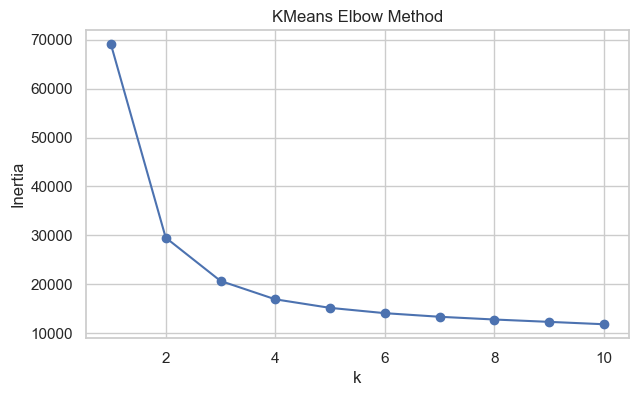

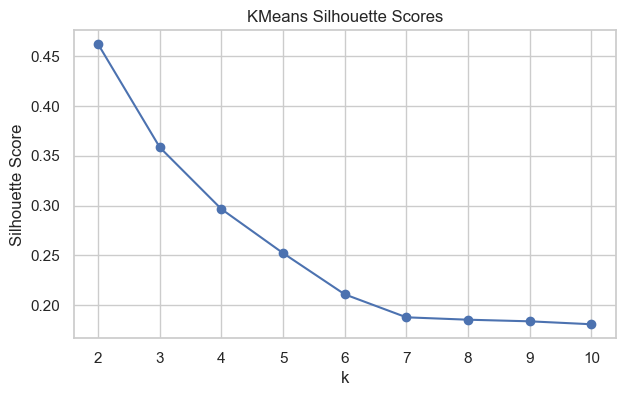

In [33]:
#KMeans clustering on scaled features (choose PCA-reduced features if high-dim)
# Optionally reduce dims first
pca = PCA(n_components=min(5, X.shape[1]))
X_pca = pca.fit_transform(scaler.fit_transform(X))
# Elbow method
inertia = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_pca)
    inertia.append(km.inertia_)
plt.figure(figsize=(7,4))
plt.plot(K, inertia, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('KMeans Elbow Method')
plt.show()
sil = []
ks = range(2,11)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    lbls = km.fit_predict(X_pca)
    sil.append(silhouette_score(X_pca, lbls))
plt.figure(figsize=(7,4))
plt.plot(ks, sil, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('KMeans Silhouette Scores')
plt.show()

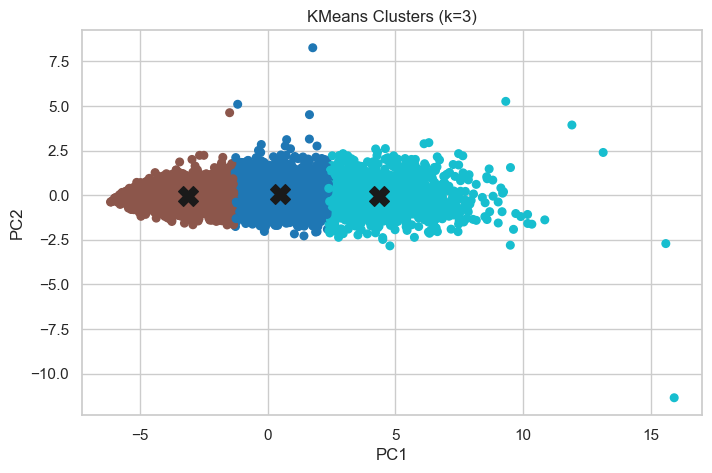

In [34]:
#Fit KMeans with chosen k (example k=3) and visualize clusters on first two PCA axes
k_chosen = 3
km = KMeans(n_clusters=k_chosen, random_state=42, n_init=10)
labels_km = km.fit_predict(X_pca)
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_km, cmap='tab10', s=30)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200, marker='X', c='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'KMeans Clusters (k={k_chosen})')
plt.show()

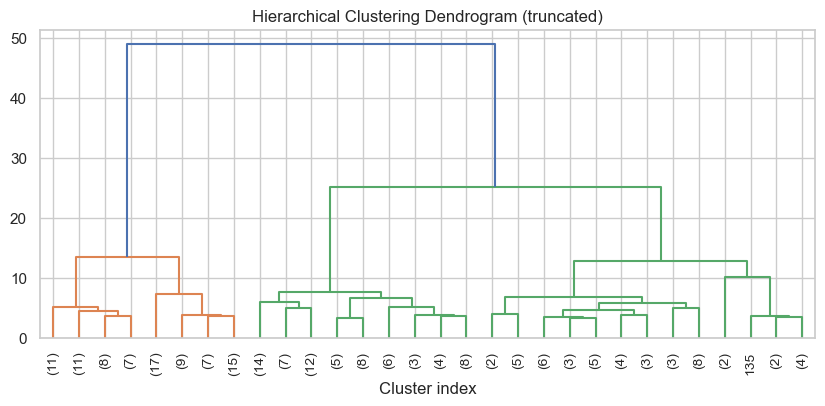

1    2436
2    1875
0    1601
Name: count, dtype: int64

In [35]:
#Agglomerative clustering and dendrogram (small sample for dendrogram)
from scipy.cluster.hierarchy import linkage, dendrogram
sample = X_pca[np.random.choice(range(X_pca.shape[0]), size=min(200, X_pca.shape[0]), replace=False)]
Z = linkage(sample, method='ward')
plt.figure(figsize=(10,4))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90.)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster index')
plt.show()
# Agglomerative clustering labels for full set
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg.fit_predict(X_pca)
pd.Series(agg_labels).value_counts()

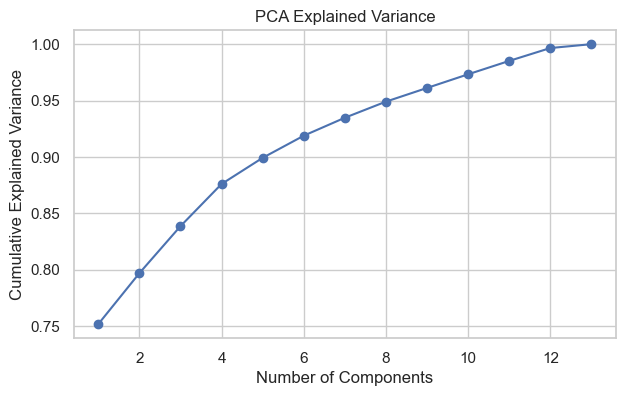

In [36]:
#PCA explained variance
pca_full = PCA()
pca_full.fit(scaler.fit_transform(X))
explained = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(7,4))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

In [37]:
# Cell 18: Save the aggregated/prepared dataset as CSV (current working directory)
grouped.to_csv("ERMN_StreamsideBirds_prepared.csv", index=False)
print("File saved successfully: ERMN_StreamsideBirds_prepared.csv")

File saved successfully: ERMN_StreamsideBirds_prepared.csv


## Summary
- We performed data aggregation, EDA, feature construction, regression (simple, multiple, polynomial), classification (logistic, KNN, NB, DecisionTree, SVM), and clustering (KMeans, hierarchical) with evaluation metrics.

In [38]:
import os
os.getcwd()


'C:\\Users\\AYUSH SHARMA\\Desktop'